In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as dates

%matplotlib inline

## 1. Tải dữ liệu

In [2]:
!wget https://www.dropbox.com/s/5avziekgdbbqd7l/TSLA_stock.csv
!wget https://www.dropbox.com/s/16m2m0rylrswemv/facebook_stock.csv
!wget https://www.dropbox.com/s/wclru5a6pm2njac/GOOG.csv

--2021-09-23 08:32:11--  https://www.dropbox.com/s/5avziekgdbbqd7l/TSLA_stock.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5avziekgdbbqd7l/TSLA_stock.csv [following]
--2021-09-23 08:32:11--  https://www.dropbox.com/s/raw/5avziekgdbbqd7l/TSLA_stock.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e7202b1bcf1c24a67bed66efd.dl.dropboxusercontent.com/cd/0/inline/BWtBRvN2u-QRIr815KNK5I88ZKysylkG-Bv-uVfJajDaDz8RZ0Rwd4E7VoTqCZnoIy3gg-W1kRyaKulRmFB8RzfHYO-eH4N96nfwMLtXpbCTxajT8kpspLMgCX7JU2HBp2k0SvLV6mQsmjhjwXT58i6y/file# [following]
--2021-09-23 08:32:12--  https://uc9e7202b1bcf1c24a67bed66efd.dl.dropboxusercontent.com/cd/0/inline/BWtBRvN2u-QRIr815KNK5I88ZKysylkG-Bv-uVfJajDaDz8RZ0Rwd4E7VoTqCZnoIy3gg-W1kRyaKulRmFB8

Đồng bộ tất cả dữ liệu bắt đầu từ thời điểm 01/01/2012. 

In [3]:
start_date = pd.to_datetime("2012-01-01")

Sử dụng `pd.read_csv()` để mở file có định dạng `csv`. Trước tiên, chúng ta sẽ mở `TSLA_stock.csv`, trong file này có `Date` là kiểu dữ liệu dòng thời gian time_series, nên chúng ta sẽ đưa chúng thành `index` bằng cách sử dụng `parse_dates=True` (ép dữ liệu cột `Date` thành kiểu `datetime`) và lấy Date làm index với `index_col='Date'`.

In [4]:
tsla_stock = pd.read_csv("TSLA_stock.csv", parse_dates=True, index_col="Date")
tsla_stock.sort_index(inplace=True)
tsla_stock = tsla_stock.loc[start_date:]
tsla_stock

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-01-03,$5.616,4640260,$5.788,$5.9,$5.53
2012-01-04,$5.542,3150180,$5.642,$5.734,$5.5
2012-01-05,$5.424,5027160,$5.552,$5.586,$5.37
2012-01-06,$5.382,4931435,$5.44,$5.558,$5.282
2012-01-09,$5.45,4484755,$5.4,$5.498,$5.224
...,...,...,...,...,...
2021-09-15,$755.83,15357690,$745,$756.86,$738.36
2021-09-16,$756.99,13923390,$752.83,$758.91,$747.61
2021-09-17,$759.49,28204180,$757.15,$761.04,$750


In [5]:
tsla_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2446 entries, 2012-01-03 to 2021-09-21
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2446 non-null   object
 1   Volume      2446 non-null   int64 
 2   Open        2446 non-null   object
 3   High        2446 non-null   object
 4   Low         2446 non-null   object
dtypes: int64(1), object(4)
memory usage: 114.7+ KB


Bạn thấy rằng trong bảng dữ liệu trên, các cột có ký hiệu `$` không đã được định dạng thành kiểu `object` hay đúng hơn là `string` thay vì kiểu `number`, vì thế nó sẽ không thể thực hiện được công việc tính toán cũng như vẽ biểu đồ. Công việc của chúng ta sẽ cần bỏ ký  hiệu `$` và ép về kiểu `float` (vì các số trong dữ liệu là số thập phân. 

`pd.replace()` sẽ giúp chúng ta loại bỏ các ký hiệu `$` này với việc áp dụng RegExp. Các tham số của phương thức này gồm : 
+ `to_replace` : Định nghĩa những giá trị hoặc phần tử nào cần chuyển
+ `value` : Giá trị thay thế cho phần tử được chuyển
+ `regexp` bool : Có sử dụng regex hay không 
+ `inplace` bool : Có cập nhật lai dữ liệu gốc hay không nếu không thì nó chỉ là một bản sao chép, không làm thay đổi dữ liệu gốc. 

In [6]:
tsla_stock.replace(to_replace="\$",value="",regex=True,inplace=True)
tsla_stock

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-01-03,5.616,4640260,5.788,5.9,5.53
2012-01-04,5.542,3150180,5.642,5.734,5.5
2012-01-05,5.424,5027160,5.552,5.586,5.37
2012-01-06,5.382,4931435,5.44,5.558,5.282
2012-01-09,5.45,4484755,5.4,5.498,5.224
...,...,...,...,...,...
2021-09-15,755.83,15357690,745,756.86,738.36
2021-09-16,756.99,13923390,752.83,758.91,747.61
2021-09-17,759.49,28204180,757.15,761.04,750


`$` đã được loại bỏ, nhưng chúng ta vẫn cần ép kiểu dữ liệu của những cột này về  kiểu số (cụ thể là `float`). 

In [7]:
tsla_stock = tsla_stock.astype("float")

In [8]:
tsla_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2446 entries, 2012-01-03 to 2021-09-21
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2446 non-null   float64
 1   Volume      2446 non-null   float64
 2   Open        2446 non-null   float64
 3   High        2446 non-null   float64
 4   Low         2446 non-null   float64
dtypes: float64(5)
memory usage: 114.7 KB


Mọi cột trong `tsla_stock` đã được chuyển thành `float64`. 

Tiếp theo, chúng ta sẽ áp dụng phương pháp trên để đọc file `facebook_stock.csv`

In [9]:
fb_stock = pd.read_csv("facebook_stock.csv", parse_dates=True, index_col="date")
fb_stock = fb_stock.loc[start_date:]
fb_stock

,open,high,low,close,volume
date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467
...,...,...,...,...,...
2021-09-14,12.93,13.06,12.79,12.86,47640810
2021-09-15,12.89,13.25,12.81,13.22,60282087
2021-09-16,13.18,13.53,13.10,13.40,76426063


In [10]:
fb_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2452 entries, 2012-01-03 to 2021-09-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2452 non-null   float64
 1   high    2452 non-null   float64
 2   low     2452 non-null   float64
 3   close   2452 non-null   float64
 4   volume  2452 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 114.9 KB


Có thể thấy rằng mọi cột trong `fb_stock` đều có kiểu số `float64` hoặc `int64`, chúng ta sẽ không cần phải ép kiểu như `tsla_stock`. 

Cuối cùng cũng áp dụng tương tự để đọc file `GOOG.csv`

In [11]:
goog_stock = pd.read_csv("GOOG.csv", parse_dates=True, index_col="Date")
goog_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,325.250885,332.827484,324.966949,331.462585,331.462585,7380561
2012-01-04,331.273315,333.873566,329.076538,332.892242,332.892242,5749470
2012-01-05,329.828735,330.745270,326.889740,328.274536,328.274536,6590410
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987
2012-01-09,322.042908,322.291962,309.455078,310.067780,310.067780,11688849
...,...,...,...,...,...,...
2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400
2021-09-16,2902.419922,2904.000000,2868.326904,2887.469971,2887.469971,1014600
2021-09-17,2875.969971,2884.989990,2821.229980,2829.270020,2829.270020,2929500


In [12]:
goog_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2446 entries, 2012-01-03 to 2021-09-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2446 non-null   float64
 1   High       2446 non-null   float64
 2   Low        2446 non-null   float64
 3   Close      2446 non-null   float64
 4   Adj Close  2446 non-null   float64
 5   Volume     2446 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 133.8 KB


## 2. Quan sát và phân tích dữ liệu 



Khối lượng giao dịch (Volume) mỗi ngày của 3 nhóm cổ phiếu trên. 

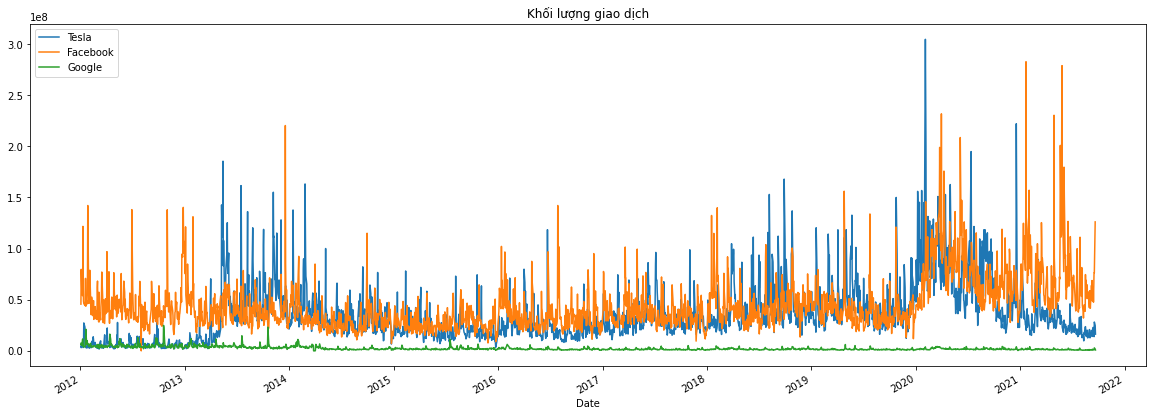

In [13]:
tsla_stock["Volume"].plot(figsize=(20,7), label="Tesla", title="Khối lượng giao dịch")
fb_stock["volume"].plot(label="Facebook")
goog_stock["Volume"].plot(label="Google")
plt.legend()

Khối lượng giao dich của `Tesla` và `Facebook` khá lớn trong giai đoạn từ giữa năm 2013 đến đầu 2021, sau đó, `Facebook` vẫn duy trì ổn định, còn `Tesla` cho thấy sự đi xuống. Còn `Google` khối lượng giao dịch vẫn duy trì ở mức thấp suốt thời thập kỷ qua. 

Có thể thấy rằng Google rất ổn định, trong khi Tesla và Facebook có khá nhiều biến động trong hoạt động kinh doanh của họ. 

Có một số biến động rất lớn của các công ty trong một thời kỳ nào đó, chẳng hạn đầu năm 2020, giá cổ phiếu của công ty Tesla đã tăng trưởng gần 800% tư `$80` lên đến gần `$700`, bạn có thể đọc để biết thêm thông tin tại https://www.forbes.com/sites/greatspeculations/2021/01/05/up-8x-what-really-changed-for-tesla-stock-in-2020/?sh=39212fd65947 

Chúng ta sẽ quan sét về sự tăng trưởng của `Tesla` từ đầu 2020 đến nay 



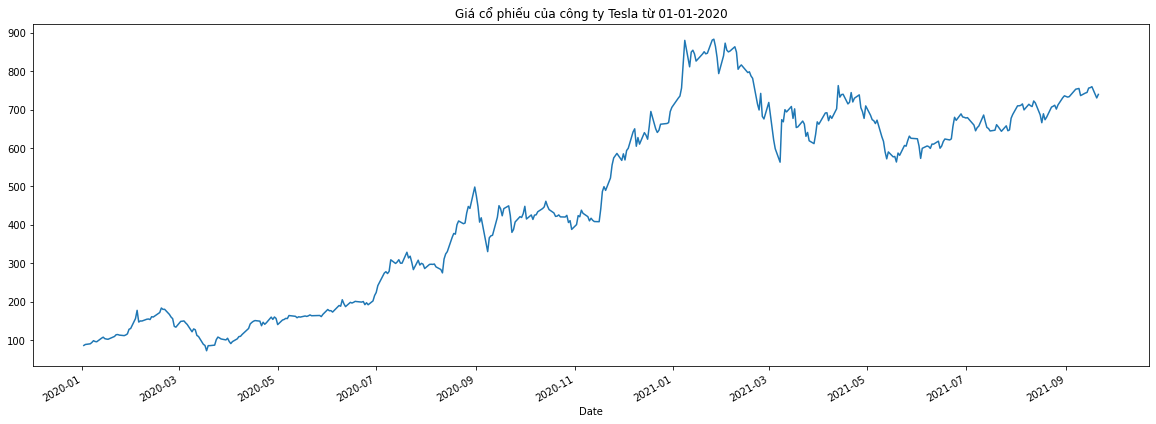

In [14]:
tsla_stock.loc["2020-01-01":]["Close/Last"].plot(figsize=(20,7), title="Giá cổ phiếu của công ty Tesla từ 01-01-2020")

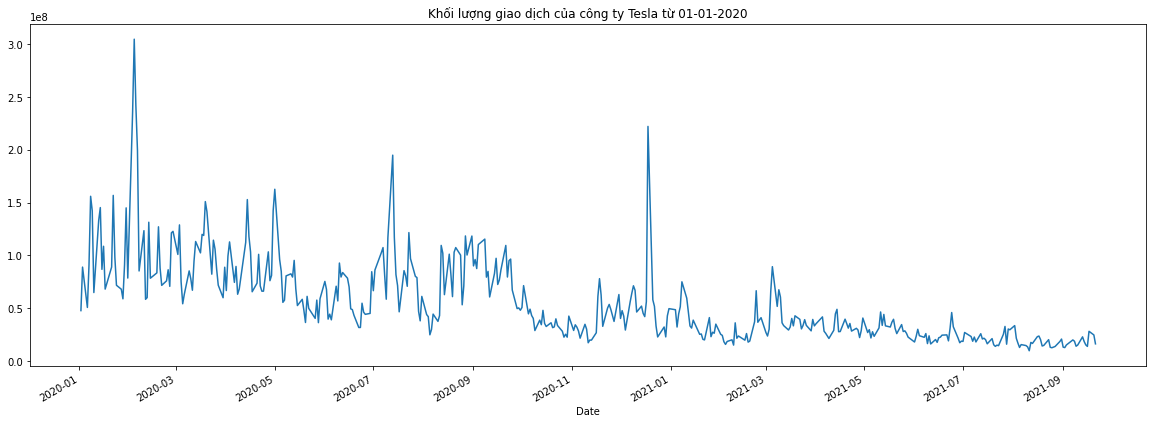

In [15]:
tsla_stock.loc["2020-01-01":]["Volume"].plot(figsize=(20,7), title="Khối lượng giao dịch của công ty Tesla từ 01-01-2020")

Trong năm 2020, Tesla có khối lượng giao dịch cực kỳ khổng lồ, nhưng từ 2021, có vẻ mọi thứ ngày càng đi xuống. 

Chúng ta sẽ xem thời điểm nào Tesla đạt khối lượng giao dịch lớn nhất, và giá cổ phiếu cao nhất. 

In [16]:
tsla_stock.iloc[tsla_stock["Volume"].argmax()]

Close/Last    1.774120e+02
Volume        3.046938e+08
Open          1.765920e+02
High          1.937980e+02
Low           1.667760e+02
Name: 2020-02-04 00:00:00, dtype: float64

Vào ngày 04-02-2020, Tesla đạt được khối lượng giao dịch lớn nhất trong suốt quá trình thành lập công ty. 

Quan sát giá cổ  phiếu đầu phiên của 3 công ty :


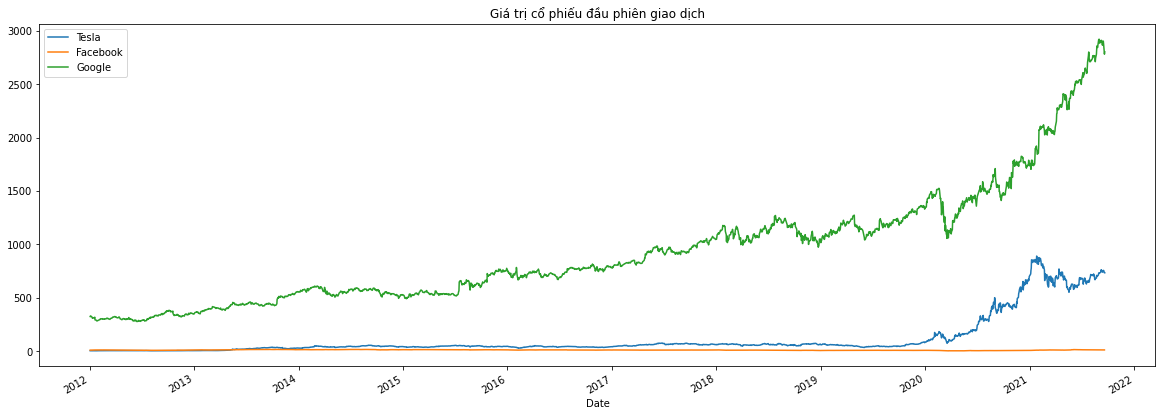

In [17]:
tsla_stock["Open"].plot(figsize=(20,7), label="Tesla", title="Giá trị cổ phiếu đầu phiên giao dịch")
fb_stock["open"].plot(label="Facebook")
goog_stock["Open"].plot(label="Google")
plt.legend()

Qua biểu đồ dòng thời gian, có thể thấy giá trị cổ phiếu của Google cao hơn rất nhiều so với `Tesla` và `Facebook`. Nhưng để thực sự để hiểu được điều này, chúng ta cần phải nhìn vào tổng giá trị vốn hóa thị trường trong công ty đó thay vì chỉ dựa trên giá trị của một cổ phiếu. Thật không may, dữ liệu hiện tại chỉ cung cấp thông tin về giá trị của một cổ phiếu mà không có tổng số cổ phiếu hiện đang có. Tuy nhiên, chúng ta vẫn có thể thực hiện một số phép tính đơn giản, chẳng hạn như `tổng số tiền giao dịch (total traded) = khối lượng giao dịch với (volume) * giá cổ phiếu đầu phiên, lúc mở của (open price)`. Lưu ý công thức này không phản ánh đúng giá trị vốn hóa thực sự của công ty, nó chỉ đại diện cho tổng lượng tiền được giao dich theo dòng thời gian. 

Chúng ta sẽ tạo một `DataFrame` có tên `total_traded` với `Open Price` * `Volume` 

In [18]:
tsla_stock["Total Traded"] = tsla_stock["Open"] * tsla_stock["Volume"]
fb_stock["Total Traded"] = fb_stock["open"] * fb_stock["volume"]
goog_stock["Total Traded"] = goog_stock["Open"] * goog_stock["Volume"]

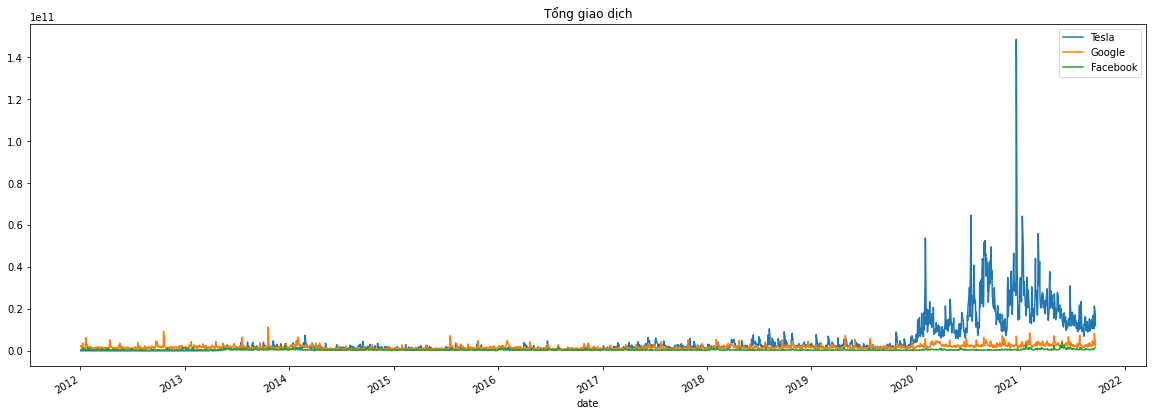

In [19]:
tsla_stock["Total Traded"].plot(figsize=(20,7), title="Tổng giao dịch" , label="Tesla")
goog_stock["Total Traded"].plot( label="Google")
fb_stock["Total Traded"].plot( label="Facebook")
plt.legend()

Tổng số giao dịch của các công ty trước 2020 đều khá ổn định, không có quá nhiều biến động đáng kể. Cho đến khi từ đầu 2020, tổng số giao dịch mà `Tesla` thực hiện đã tăng vọt và kéo dài cho đến hiện tại (Tháng 10 - 2021). Để rõ hơn, chúng ta sẽ lấy đầu 2020 làm mốc để có thể quan sát tổng số giao dịch của các công ty.

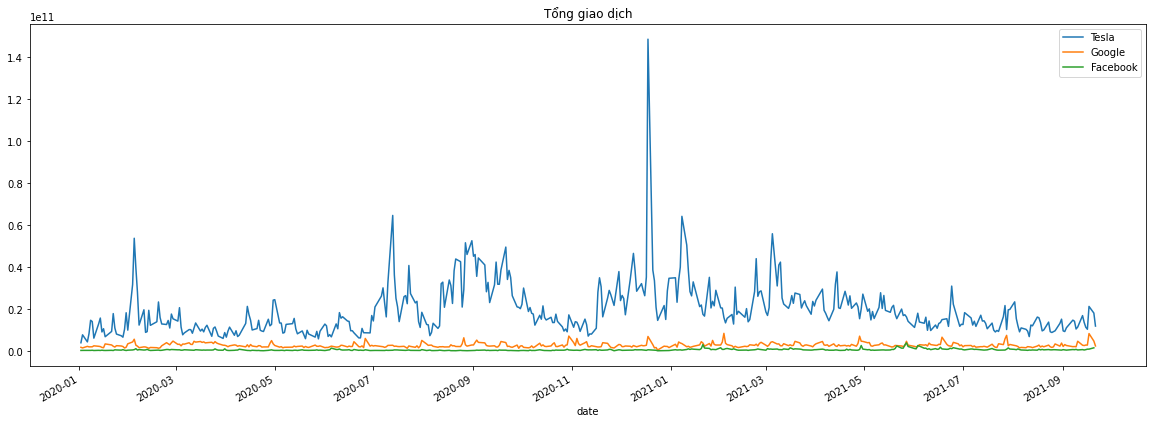

In [20]:
start_total_traded = "2020-01-01"

tsla_stock.loc[start_total_traded:]["Total Traded"].plot(figsize=(20,7), title="Tổng giao dịch" , label="Tesla")
goog_stock.loc[start_total_traded:]["Total Traded"].plot( label="Google")
fb_stock.loc[start_total_traded:]["Total Traded"].plot( label="Facebook")
plt.legend()

Tiếp theo, chúng ta sẽ tạo đường trung bình động cho (MA- Moving average) cho giá cổ phiếu lúc mở của cho từng công ty.
+ Facebook : MA50 và MA200
+ Tesla : MA50 và MA200
+ Google : MA50 và MA200

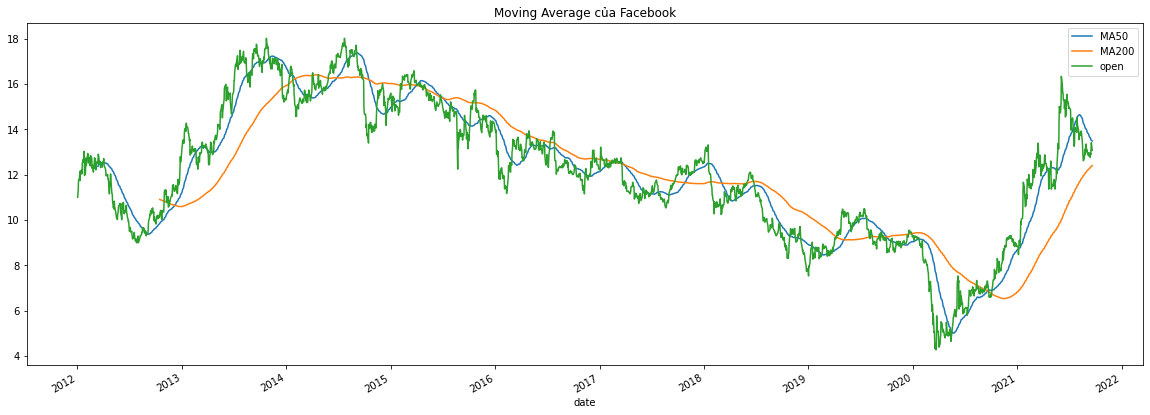

In [21]:
fb_stock["MA50"] = fb_stock["open"].rolling(50).mean()
fb_stock["MA200"] = fb_stock["open"].rolling(200).mean()
fb_stock[["MA50", "MA200", "open"]].plot(figsize=(20,7), title=("Moving Average của Facebook"))

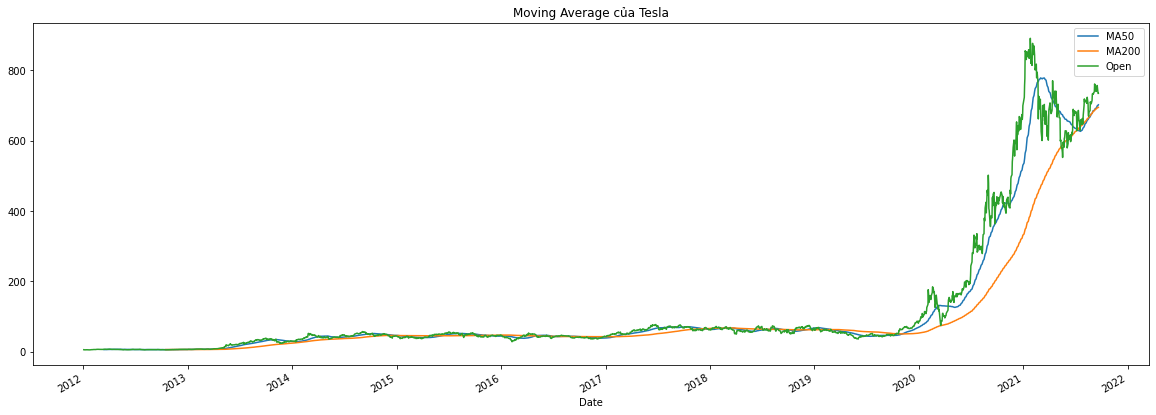

In [22]:
tsla_stock["MA50"] = tsla_stock["Open"].rolling(50).mean()
tsla_stock["MA200"] = tsla_stock["Open"].rolling(200).mean()
tsla_stock[["MA50", "MA200", "Open"]].plot(figsize=(20,7), title=("Moving Average của Tesla"))

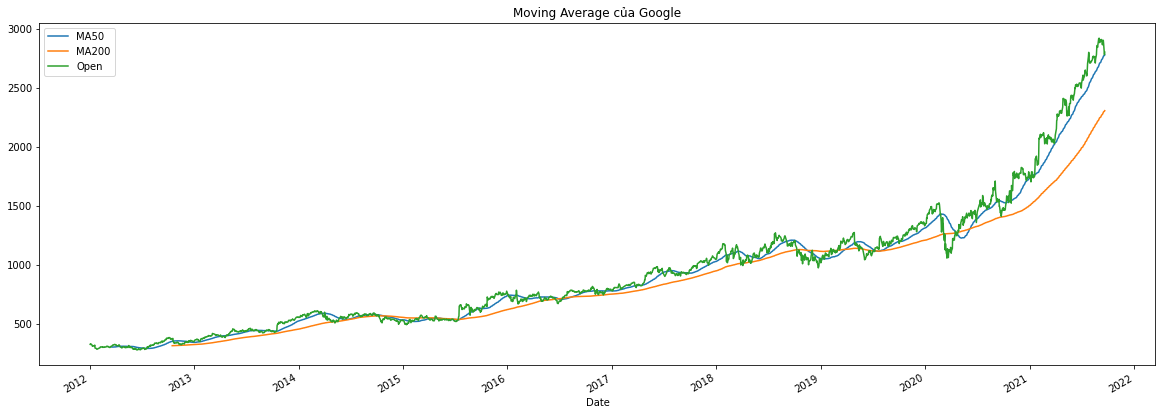

In [23]:
goog_stock["MA50"] = goog_stock["Open"].rolling(50).mean()
goog_stock["MA200"] = goog_stock["Open"].rolling(200).mean()
goog_stock[["MA50", "MA200", "Open"]].plot(figsize=(20,7), title=("Moving Average của Google"))

Trong trường hợp của chúng ta, đường MA phản ánh sự biến động của giá cổ phiều lúc mở cửa, có thể thấy MA của `Google` ổn định hơn so với `Tesla` và `Facebook`. `Tesla` khá ổn định cho tới đầu 2020, còn `Facebook` thì dao động mạnh. 

### Sử dụng scatter matrix để vẽ đồ thị tương quan giữa 3 cty

Cuối cùng, để thấy được mối liên hệ giữa 3 công ty với nhau, chúng ta sẽ lập biểu đồ thể hiện sự tương quan. Trong thực tế, Google và Facebook là 2 gã khổng lồ công nghệ, còn Tesla chỉ đơn thuần là công ty xe điện công nghê, nếu nói về tương quan thì có thể Facebook và Google sẽ mật thiết hơn so với Tesla, nhưng có thể Tesla cũng có tác động mạnh đến 2 hãng công nghệ trên vì Elon Musk, ông chủ của hãng Tesla là người luôn có ảnh hưởng rất lớn đến lĩnh vực công nghệ cũng như liên quan đến blockchain.



In [24]:
from pandas.plotting import scatter_matrix

In [25]:
tech_comp = pd.concat([tsla_stock["Open"], fb_stock["open"], goog_stock["Open"]], axis=1)
tech_comp

,Open,open,Open
2012-01-03,5.7880,11.00,325.250885
2012-01-04,5.6420,11.15,331.273315
2012-01-05,5.5520,11.33,329.828735
2012-01-06,5.4400,11.74,328.344299
2012-01-09,5.4000,11.83,322.042908
...,...,...,...
2021-09-15,745.0000,12.89,2875.179932
2021-09-16,752.8300,13.18,2902.419922
2021-09-17,757.1500,13.41,2875.969971
2021-09-20,734.5577,13.07,2780.003906


In [26]:
tech_comp.columns = ["Tesla open" , "FB open", "Google open"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef7beda210>,
      dtype=object)

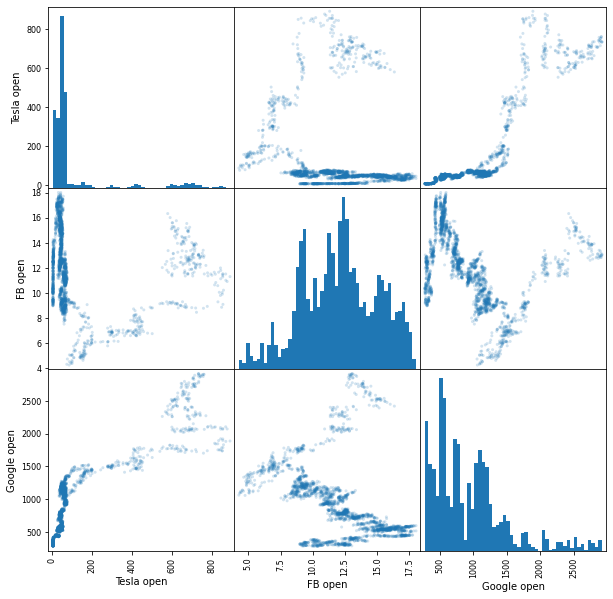

In [27]:
scatter_matrix(tech_comp, figsize=(10,10),alpha=0.2, hist_kwds={"bins" : 50})

### Sử dụng CandleStick để vẽ biểu đồ của Google trong  3 tháng đầu năm 2021

In [28]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     - 306 kB 2.2 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=e2ac7e587814be49d20823c8f13e786eeef12641b507e95d95816bc862eedc60
  Stored in directory: /tmp/pip-ephem-wheel-cache-kpby0osu/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [37]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, DayLocator, MONDAY, WeekdayLocator, date2num

In [30]:
goog_stock.head()


,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200
Date,,,,,,,,,
2012-01-03,325.250885,332.827484,324.966949,331.462585,331.462585,7380561,2.400534e+09,NaN,NaN
2012-01-04,331.273315,333.873566,329.076538,332.892242,332.892242,5749470,1.904646e+09,NaN,NaN
2012-01-05,329.828735,330.745270,326.889740,328.274536,328.274536,6590410,2.173707e+09,NaN,NaN
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,1.775025e+09,NaN,NaN
2012-01-09,322.042908,322.291962,309.455078,310.067780,310.067780,11688849,3.764311e+09,NaN,NaN


In [31]:
goog_2021 = goog_stock.loc["2021-01" : "2021-03"]


In [32]:
goog_2021 = goog_2021.reset_index()
goog_2021

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200
0,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900,3.342665e+09,1736.731184,1505.562528
1,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300,1.975642e+09,1739.370183,1508.508928
2,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100,4.430414e+09,1740.901384,1511.715479
3,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000,3.941236e+09,1743.202385,1514.896929
4,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600,3.666432e+09,1747.048584,1518.204479
...,...,...,...,...,...,...,...,...,...,...
56,2021-03-25,2044.810059,2058.870117,2010.729980,2044.359985,2044.359985,1418900,2.901381e+09,2007.092998,1697.743817
57,2021-03-26,2038.859985,2050.989990,2014.020020,2035.550049,2035.550049,1493500,3.045037e+09,2013.098599,1700.640417
58,2021-03-29,2027.880005,2058.429932,2015.619995,2055.949951,2055.949951,1229800,2.493887e+09,2018.583799,1703.567417
59,2021-03-30,2057.629883,2070.780029,2044.030029,2055.540039,2055.540039,1036600,2.132939e+09,2024.972598,1706.713116


In [33]:
goog_2021["date_ax"] = goog_2021["Date"].apply(lambda date : date2num(date))
goog_2021

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,date_ax
0,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900,3.342665e+09,1736.731184,1505.562528,737794.0
1,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300,1.975642e+09,1739.370183,1508.508928,737795.0
2,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100,4.430414e+09,1740.901384,1511.715479,737796.0
3,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000,3.941236e+09,1743.202385,1514.896929,737797.0
4,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600,3.666432e+09,1747.048584,1518.204479,737798.0
...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-25,2044.810059,2058.870117,2010.729980,2044.359985,2044.359985,1418900,2.901381e+09,2007.092998,1697.743817,737874.0
57,2021-03-26,2038.859985,2050.989990,2014.020020,2035.550049,2035.550049,1493500,3.045037e+09,2013.098599,1700.640417,737875.0
58,2021-03-29,2027.880005,2058.429932,2015.619995,2055.949951,2055.949951,1229800,2.493887e+09,2018.583799,1703.567417,737878.0
59,2021-03-30,2057.629883,2070.780029,2044.030029,2055.540039,2055.540039,1036600,2.132939e+09,2024.972598,1706.713116,737879.0


In [34]:
list_of_cols = ["date_ax", "Open", "High", "Low", "Close"]
goog_2021_values = [tuple(vals) for vals in goog_2021[list_of_cols].values]
goog_2021_values

[(737794.0,
  1757.540039,
  1760.6500239999998,
  1707.8499760000002,
  1728.2399899999998),
 (737795.0, 1725.0, 1747.6700440000002, 1718.015015, 1740.9200440000002),
 (737796.0, 1702.630005, 1748.0, 1699.0, 1735.290039),
 (737797.0, 1740.060059, 1788.4000239999998, 1737.050049, 1787.25),
 (737798.0, 1787.97998, 1809.839966, 1773.535034, 1807.209961),
 (737801.0, 1786.069946, 1794.314941, 1760.52002, 1766.719971),
 (737802.0, 1753.9200440000002, 1778.040039, 1725.310059, 1746.550049),
 (737803.0,
  1738.5799559999998,
  1765.035034,
  1738.0100100000002,
  1754.4000239999998),
 (737804.0, 1753.619995, 1775.0100100000002, 1733.4000239999998, 1740.180054),
 (737805.0, 1738.189941, 1756.0, 1721.550049, 1736.189941),
 (737809.0, 1752.25, 1809.2750239999998, 1741.459961, 1790.859985),
 (737810.0, 1831.459961, 1903.709961, 1825.530029, 1886.9000239999998),
 (737811.0, 1898.0, 1934.859985, 1887.109985, 1891.25),
 (737812.0, 1895.680054, 1910.949951, 1881.7600100000002, 1901.050049),
 (737815

In [35]:
mondays = WeekdayLocator(MONDAY) # mỗi tick đại diện cho ngày thứ 2
alldays = DayLocator() # những tick không thể hiện đại diên cho những ngày còn lại
weekFormatter = DateFormatter("%b %d") # VD : Jan 15
dayFormatter = DateFormatter("%d") # VD 15

(array([737794., 737801., 737808., 737815., 737822., 737829., 737836.,
        737843., 737850., 737857., 737864., 737871., 737878.]),
 <a list of 13 Text major ticklabel objects>)

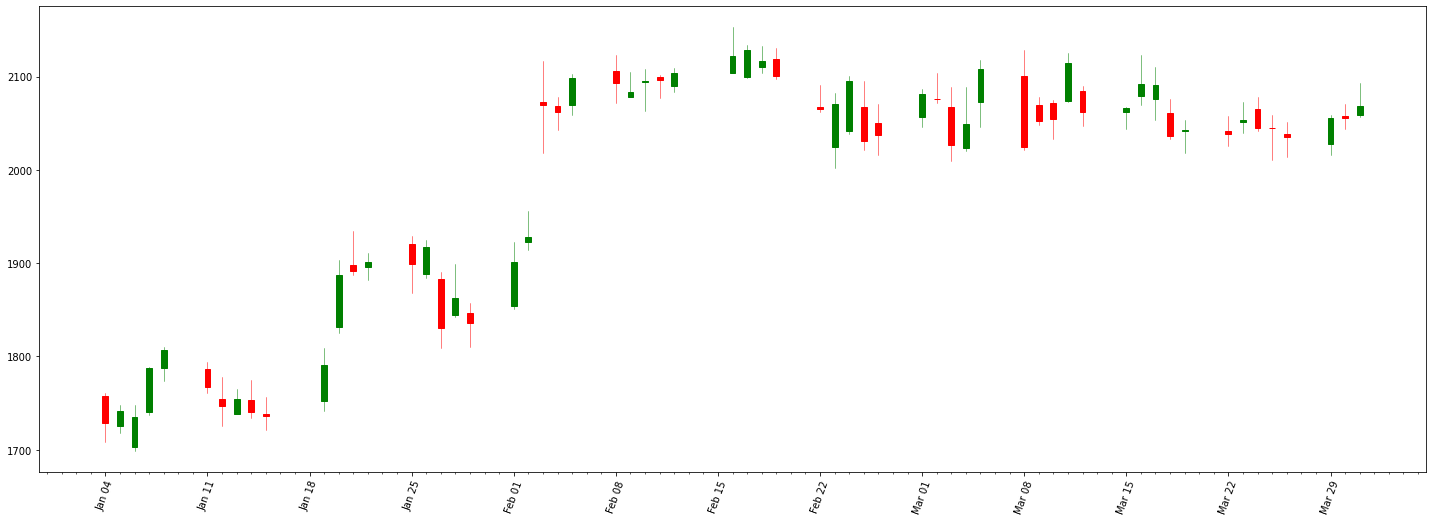

In [38]:
fig, ax = plt.subplots(figsize=(20,7))
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter) 
fig.subplots_adjust(bottom=0.2)

axes = candlestick_ohlc(ax,goog_2021_values, width=0.4, colorup="g", colordown="r")
plt.tight_layout()
plt.xticks(rotation=70)

## Phân tích tài chính 

Chúng ta sẽ tập trung vào việc tính toán, phân tích tình hình tài chính của các công ty bằng cách áp dụng công thức, phương trình toán học kết hợp với python, pandas.


### So sánh độ biến động lợi nhuận hàng ngày 

Đầu tiên, chúng ta sẽ tính toán tỉ lệ thay đổi hàng ngày, nghĩa là sự thay đổi của ngày hôm nay so với ngày hôm trước là bao nhiêu phần trăm. 

$r_t =  \frac{p_t}{p_{t-1}} -1 $

Với ${r_t}$ là tỉ lệ được tính bằng giá của thời điểm ${t}$ chia cho giá ở thời điểm ${t-1}$ và trừ đi 1. Về cơ bản, điều này chỉ thông báo cho bạn về giá cổ phiếu tăng (hoặc giảm) nếu bạn mua cổ phiếu trong ngày hôm nay và bán ra vào ngày hôm sau. Công thức này không có ý nghĩa dự đoán giá trị cổ phiếu trong tương lai, nó chỉ có ích cho việc phân tích độ biến động của cổ phiếu. Nếu lợi nhuận hàng ngày ( đo lường sự thay đổi trong giá cổ phiếu theo tỷ lệ phần trăm của giá đóng cửa của ngày hôm trước) có một sự phân bố rộng lớn, thì độ biến động của ngày kế tiếp so với ngày hôm trước sẽ càng lớn.

Chúng ta sẽ tính toán tỉ lệ lợi tức , biểu diễn trên biểu đồ histogram và quyết định cổ phiếu nào là ổn định nhất. 


In [39]:
# tsla_stock["returns"] = tsla_stock["Close/Last"] / tsla_stock["Close/Last"].shift(periods=1) - 1
tsla_stock["returns"] = tsla_stock["Close/Last"].pct_change(1)
fb_stock["returns"] = fb_stock["close"].pct_change(1)
goog_stock["returns"] = goog_stock["Close"].pct_change(1)

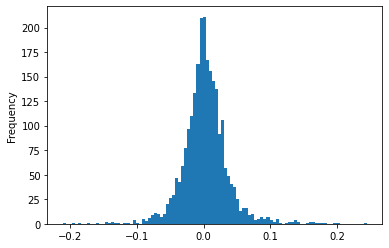

In [40]:
tsla_stock["returns"].plot.hist(bins=100)

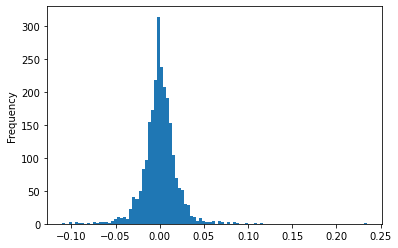

In [41]:
fb_stock["returns"].plot.hist(bins=100)

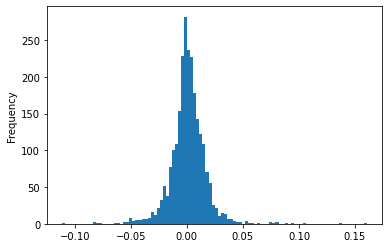

In [42]:
goog_stock["returns"].plot.hist(bins=100)

`Tesla` trên trục x có xu hưởng nở rộng hơn so với 2 biểu đồ còn lại, cổ phiếu của công ty này có thể tăng rất nhanh nhưng cũng giảm rất nhanh từ ngày hôm trước qua ngày hôm sau. 
Thay vì 3 biểu đồ nếu quan sát qua có vẻ chúng khá tương đồng với nhau, chúng ta sẽ chồng các biểu đồ này thành một. để có thể so sánh trực quan hơn.

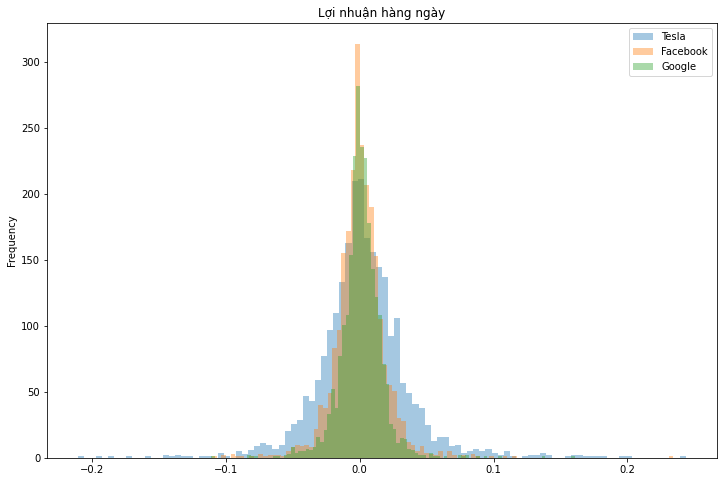

In [43]:
tsla_stock["returns"].plot.hist(figsize=(12,8), label="Tesla", alpha=0.4, title="Lợi nhuận hàng ngày", bins=100)
fb_stock["returns"].plot.hist( label="Facebook", bins=100, alpha=0.4)
goog_stock["returns"].plot.hist( label="Google", bins=100, alpha=0.4)
plt.legend()

Có thể thay thế biểu đồ histogram bằng KDE

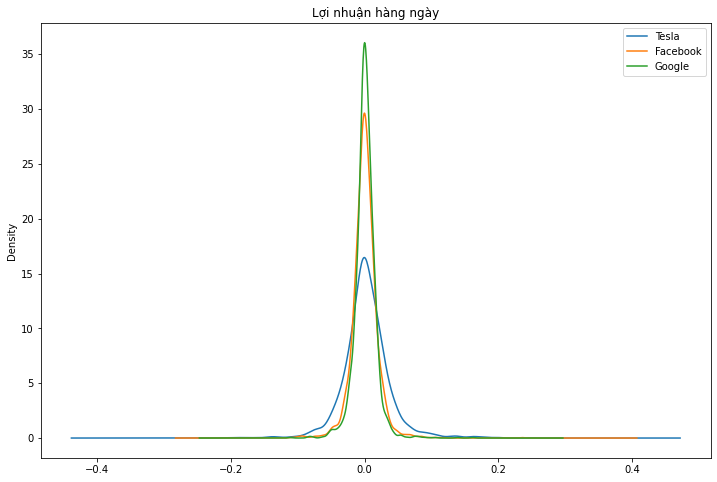

In [44]:
tsla_stock["returns"].plot.kde(figsize=(12,8), label="Tesla", title="Lợi nhuận hàng ngày" )
fb_stock["returns"].plot.kde( label="Facebook" )
goog_stock["returns"].plot.kde( label="Google" )
plt.legend()

Qua biểu đồ trên, chúng ta có thể thấy rõ ràng đa phần giá cổ phiếu của `Google` có hình dạng nhô lên nhọn nhất tập trung tại giá trị 0, có nghĩa giá cổ phiếu không có sự biến động giữa ngày liên tiếp nhau. `Facebook` cũng tương tự như vây. Trong khi `Tesla` đường của nó thì lõm hơn và có xu hướng mở rộng sang 2 bên xung quanh giá trị 0, cho thấy giá cổ phiếu giữa 2 ngày liên tiếp có sự biến động.



Ngoài ra, chúng ta có thể tạo biểu đồ box để so sánh lợi nhuận hàng ngày của các công ty.

In [45]:
returns_df = pd.concat([tsla_stock["returns"], fb_stock["returns"], goog_stock["returns"]], axis=1)
returns_df.columns = ["Tesla", "Facebook", "Google"]
returns_df

,Tesla,Facebook,Google
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.015274,0.004313
2012-01-05,-0.021292,0.025664,-0.013871
2012-01-06,-0.007743,0.010354,-0.013642
2012-01-09,0.012635,0.007686,-0.042399
...,...,...,...
2021-09-15,0.015232,0.027994,0.012552
2021-09-16,0.001535,0.013616,-0.005733
2021-09-17,0.003303,0.011194,-0.020156
2021-09-20,-0.038605,-0.053875,-0.017294


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


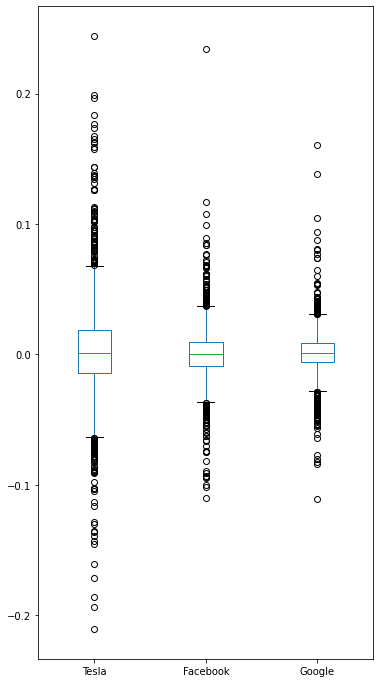

In [46]:
returns_df.plot.box(figsize=(6,12))

`Tesla` có vùng phân bố khá rộng và có nhiều outliers. 2 công ty còn lại khá tương đồng và ổn định về lợi nhuận hàng ngày, giá cổ phiếu không có nhiều biến động.

### Tìm mối tương quan về tỉ lệ nhuận giữa các công ty

giá trị cổ phiếu có thể bị ảnh hưởng dây chuyền với nhau giữa các công ty có xu hướng chúng một lĩnh vực hoặc các lĩnh vực có mối liên kết mật thiết với nhau. Chẳng hạn, Google và Facebook là 2 công ty về lĩnh vực công nghệ, nếu thị trường có xu hướng công nghệ mới thì ngay lập tức những ông lớn này sẽ có được giá cổ phiếu thay đổi trong cùng thời điểm. Chúng ta sẽ biểu diễn mối liên hệ giữa các công ty với `scatter_matrix`

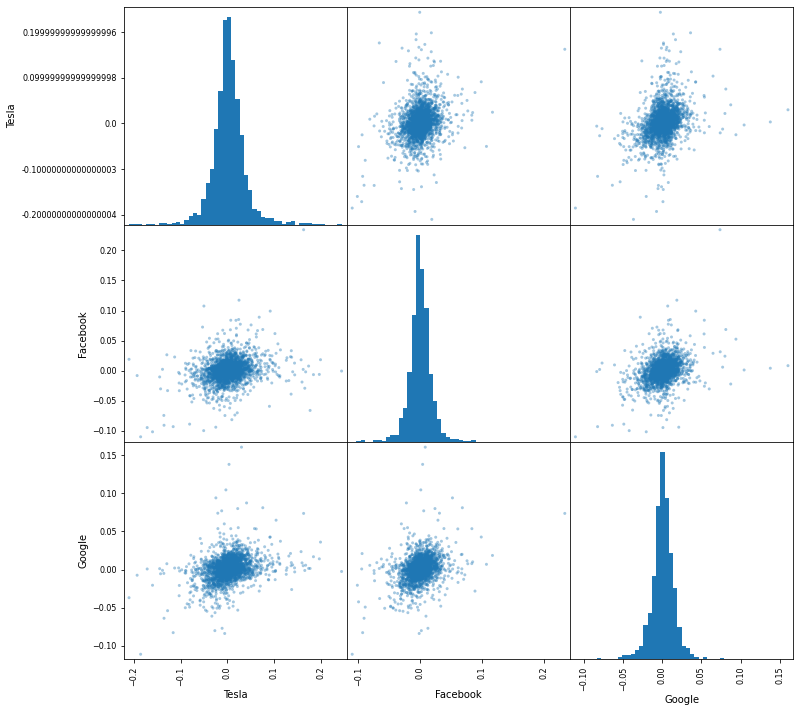

In [47]:
sm = scatter_matrix(returns_df,alpha=0.4, figsize=(12,12 ),hist_kwds={"bins" : 50})

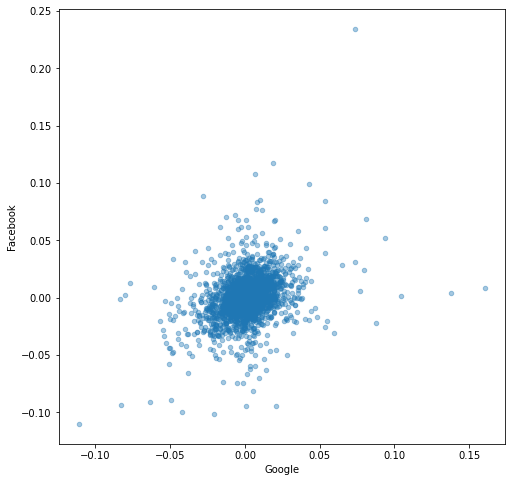

In [48]:
returns_df.plot.scatter(x="Google", y="Facebook", alpha=0.4, figsize=(8,8))

### Lợi nhuận tích lũy (Cummulative return)

**Lợi nhuận tích lũy** là tổng số tiền mà một khoản đầu tư đã thu được hoặc bị mất theo thời gian, không phụ thuộc vào khoảng thời gian liên quan.

Điều này khác với chỉ giá cổ phiếu tại thời điểm hiện tại, bởi vì nó sẽ tính đến lợi nhuận hàng ngày. Lưu ý rằng, phép tính đơn giản của chúng tôi ở đây sẽ không tính đến các cổ phiếu mang lại cổ tức.

Giả sử  có một cổ phiếu 'ABC' đang được giao dịch trên một sàn. ABC có các mức giá sau tương ứng với những ngày đã cho…

| Date | Price | 
| ---- | ----- | 
| 01/01/2021 | 10 | 
| 02/01/2021 | 15 | 
| 03/01/2021 | 20 | 
| 04/01/2021 | 25 | 

**Lợi nhuận hàng ngày**: là lãi / lỗ của cổ phiếu so với ngày hôm trước.

Nếu tỉ lệ giữa giá của ngày hôm nay so với  ngày hôm trước >1 thì lời, còn <1 thì lỗ. 

Ngoài ra, người ta còn thể hiện theo tỷ lệ phần trăm để truyền tải thông tin tốt hơn thay vì là những con sồ nhỏ hơn 1. 

Khi được biểu thị bằng tỷ lệ phần trăm, nếu giá trị trên 0, cổ phiếu đã mang lại cho bạn lợi nhuận, nếu không thì đó là một khoản lỗ.

|Ngày  | Lợi nhuận hàng ngày | %Lợi nhuận hàng ngày|
| ---  |  ----------- | ------------- | 
| 01/01/2018 | 10/10 =  1 |   - | 
|01/02/2018 | 15/10 =  3/2 | 50% | 
| 01/03/2018 | 20/15 =  4/3 | 33% | 
|01/04/2018 | 25/20 =  5/4 | 20% |

Mặc dù lợi nhuận hàng ngày đem lại những ưu điểm, nhưng nó không cung cấp cho nhà đầu tư cái nhìn sâu sắc ngay lập tức về lợi nhuận mà họ đã đạt được từ ngày đầu tư cho đến thời điểm hiện tại, đặc biệt với những cổ phiếu dễ biến động.

Lợi nhuận tích lũy được tính toán giá trị cổ phiếu của ngày hiện tại so với thời điểm bắt đầu mở đầu tư.. Nếu tỉ lệ này >1 thì đầu tư này có lời, ngược lại là lỗ. 

| Date | Lợi nhuận tích lũy | %Lợi nhuận tích lũy | 
| ---- | -----------------  | ------------------  |
| 01/01/2018 | 10/10 =  1 | 100 % | 
| 01/02/2018 | 15/10 =  3/2 | 150 % | 
| 01/03/2018 | 20/10 =  2 | 200 % | 
| 01/04/2018 | 25/10 =  5/2 | 250 % | 


Công thức cho lợi nhuận tích lũy là: $i_t = 1 + \sum_{i=0}^{t}(r_i)$

trong đó : 
+ $r_t$ : là tỉ lệ cổ phiếu so với thời điểm hôm trước


In [54]:
tsla_stock["Cummulative return"] = (1+ tsla_stock["returns"] ).cumprod()
goog_stock["Cummulative return"] = (1 + goog_stock["returns"]).cumprod()
fb_stock["Cummulative return"] = (1 + fb_stock["returns"]).cumprod()

In [59]:
cummulative_returns = pd.concat([tsla_stock["Cummulative return"] ,fb_stock["Cummulative return"], goog_stock["Cummulative return"] ,], axis=1)
cummulative_returns.columns = ["Tesla", "Facebook", "Google"]
cummulative_returns

,Tesla,Facebook,Google
2012-01-03,NaN,NaN,NaN
2012-01-04,0.986823,1.015274,1.004313
2012-01-05,0.965812,1.041330,0.990382
2012-01-06,0.958333,1.052111,0.976871
2012-01-09,0.970442,1.060198,0.935453
...,...,...,...
2021-09-15,134.585114,1.187781,8.761532
2021-09-16,134.791667,1.203953,8.711300
2021-09-17,135.236823,1.217430,8.535715
2021-09-20,130.016026,1.151842,8.388096


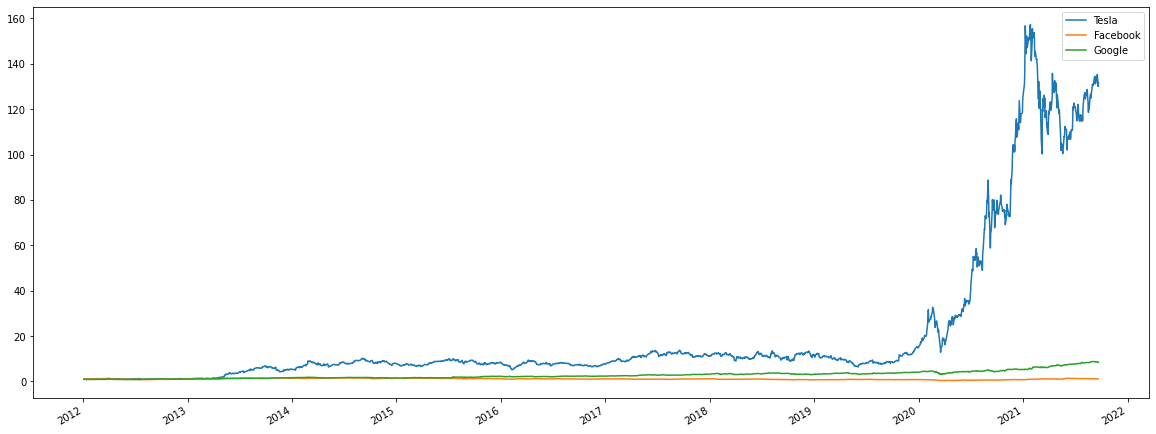

In [68]:
cummulative_returns[cummulative_returns.columns].plot(figsize=(20,8))

`Tesla` là công ty có cổ phiếu đem lại lợi nhuận cao dành cho các nhà đầu tư, và thời điểm bùng nổ nhất bắt đầu từ giữa năm 2020 với lợi nhuận có thể lên đến 160%

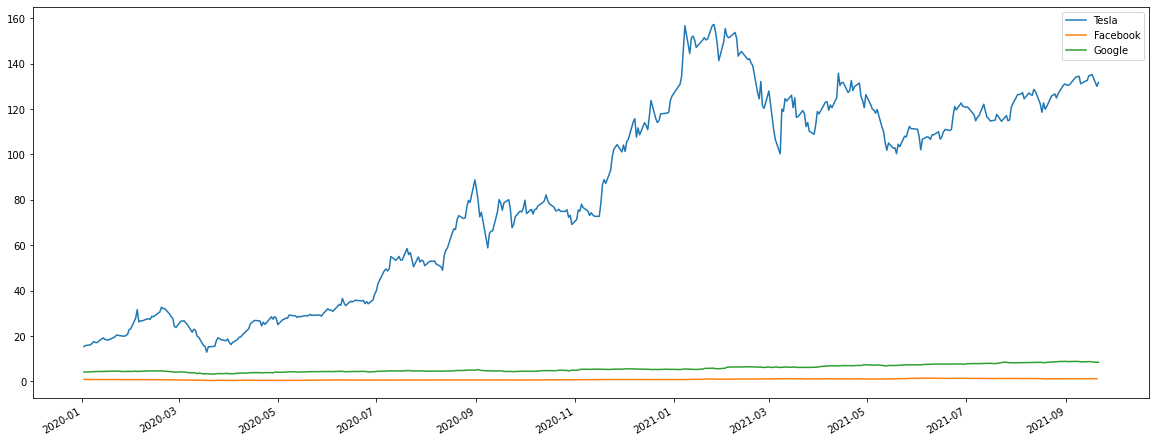

In [69]:
cummulative_returns.loc["2020":][cummulative_returns.columns].plot(figsize=(20,8))